In [64]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as pkt 
from sklearn.model_selection import train_test_split
import seaborn as sn 
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


In [65]:
gold_data = pd.read_csv("gld_price_data.csv")
gold_data = gold_data.drop("Date", axis=1)
gold_data.head()

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.180,1.471692
1,1447.160034,85.570000,78.370003,15.285,1.474491
2,1411.630005,85.129997,77.309998,15.167,1.475492
3,1416.180054,84.769997,75.500000,15.053,1.468299
4,1390.189941,86.779999,76.059998,15.590,1.557099


In [66]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SPX      2290 non-null   float64
 1   GLD      2290 non-null   float64
 2   USO      2290 non-null   float64
 3   SLV      2290 non-null   float64
 4   EUR/USD  2290 non-null   float64
dtypes: float64(5)
memory usage: 89.6 KB


In [67]:
gold_data.tail()

,SPX,GLD,USO,SLV,EUR/USD
2285,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,2725.780029,122.543800,14.4058,15.4542,1.182033


In [68]:
gold_data.describe()


,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


correlation
+ve - x increases y increases
-ve - x increase y deceases

In [69]:

correlation = gold_data.corr()

<Axes: >

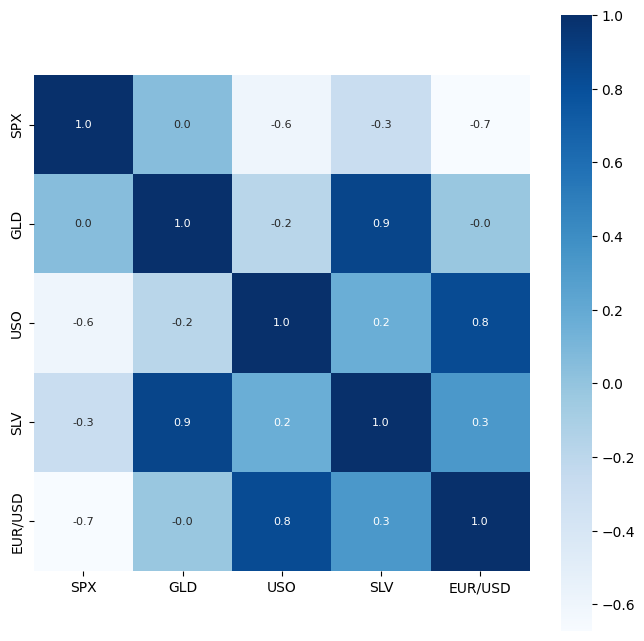

In [70]:
pkt.figure(figsize=(8,8))
sn.heatmap(correlation ,cbar=True , square=True ,fmt=".1f" ,annot=True, annot_kws={'size':8},cmap="Blues")

correlation values

In [71]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\heman\AppData\Local\Temp\ipykernel_7004\2374213634.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(gold_data["GLD"],color= "blue")


<Axes: xlabel='GLD', ylabel='Density'>

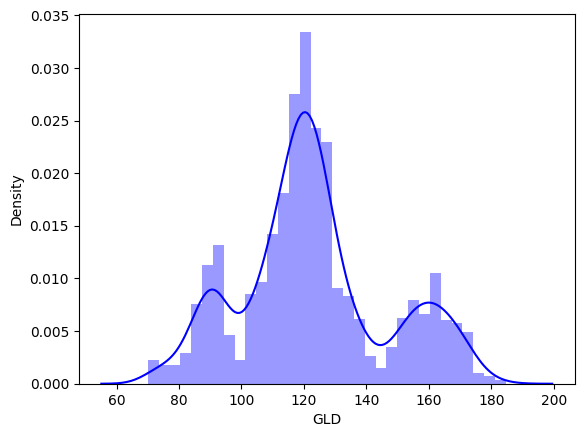

In [72]:
sn.distplot(gold_data["GLD"],color= "blue")

spliting the features

In [73]:
X = gold_data.drop(["GLD"] , axis = 1)
Y = gold_data['GLD']
print(X.shape)
print(Y.shape)

(2290, 4)
(2290,)


splitting into training data and test data

In [78]:
X_train  , X_test ,Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [79]:
print(X_train.shape)
print(Y_train.shape)

(1832, 4)
(1832,)


model trainig

In [80]:
Model = RandomForestRegressor(n_estimators=100)
Model.fit(X_train,Y_train)

RandomForestRegressor()

model evalution

In [81]:
train_data_prediction = Model.predict(X_train)
print(train_data_prediction)

[109.94259819 114.99560098  90.70680006 ... 130.80479704 160.00659623
 114.69339991]


In [84]:
#r2 square value 
error_score = metrics.r2_score(Y_train,train_data_prediction)
print(error_score)

0.9984823772178243


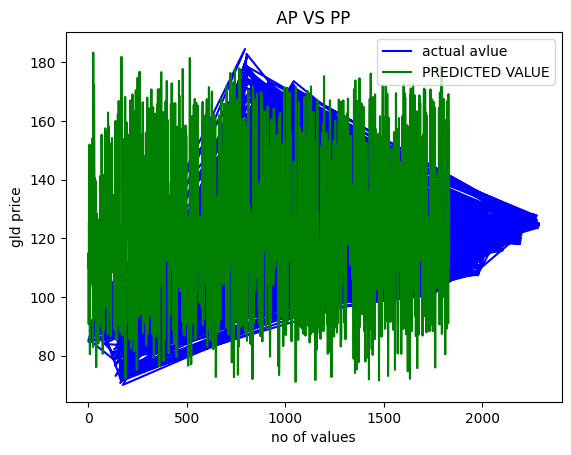

In [85]:
#compare the actual values and predicted values in a plot

pkt.plot(Y_train , color='blue' , label = "actual avlue")
pkt.plot(train_data_prediction , color = 'green' , label = 'PREDICTED VALUE')
pkt.title(" AP VS PP " )
pkt.xlabel("no of values")
pkt.ylabel("gld price")
pkt.legend()
pkt.show()